## Task 1.1
Visualize the univariate distribution of each feature, and the distribution of the target. Do you notice anything? Is something that you think might require special treatment (comment what it is, you’re not required to try to fix it).

In [135]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
import matplotlib.pyplot as plt

In [171]:
houses = datasets.fetch_california_housing(download_if_missing=True)

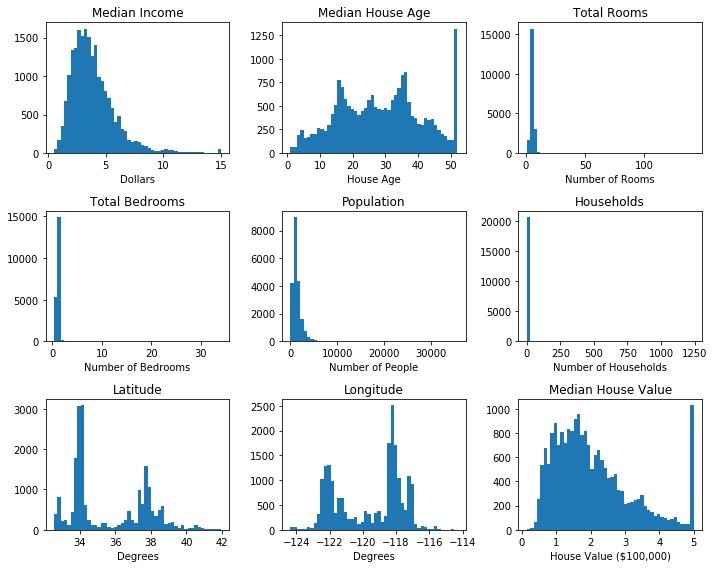

In [165]:
fig=plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(3,3,1)
ax1.hist(houses.data[:,0],bins = 50)
plt.title('Median Income')
plt.xlabel('Dollars')

ax2 = fig.add_subplot(3,3,2)
ax2.hist(houses.data[:,1],bins = 50)
plt.title('Median House Age')
plt.xlabel('House Age')

ax3 = fig.add_subplot(3,3,3)
ax3.hist(houses.data[:,2],bins = 50)
plt.title('Total Rooms')
plt.xlabel('Number of Rooms')

ax4 = fig.add_subplot(3,3,4)
ax4.hist(houses.data[:,3],bins = 50)
plt.title('Total Bedrooms')
plt.xlabel('Number of Bedrooms')

ax5 = fig.add_subplot(3,3,5)
ax5.hist(houses.data[:,4],bins = 50)
plt.title('Population')
plt.xlabel('Number of People')

ax6 = fig.add_subplot(3,3,6)
ax6.hist(houses.data[:,5],bins = 50)
plt.title('Households')
plt.xlabel('Number of Households')

ax7 = fig.add_subplot(3,3,7)
ax7.hist(houses.data[:,6],bins = 50)
plt.title('Latitude')
plt.xlabel('Degrees')

ax8 = fig.add_subplot(3,3,8)
ax8.hist(houses.data[:,7],bins = 50)
plt.title('Longitude')
plt.xlabel('Degrees')

ax9 = fig.add_subplot(3,3,9)
ax9.hist(houses.target,bins = 50)
plt.title('Median House Value')
plt.xlabel('House Value ($100,000)')

plt.tight_layout()
plt.show()


The variables "Total Rooms", "Total Bedrooms", "Population", and "Households" may need special treatment as most of the values appear to be near 0, but the autoscale on the histograms suggests that those features may have a few outliers. To check this, I decided to make boxplots of the feature variables as well (see below):

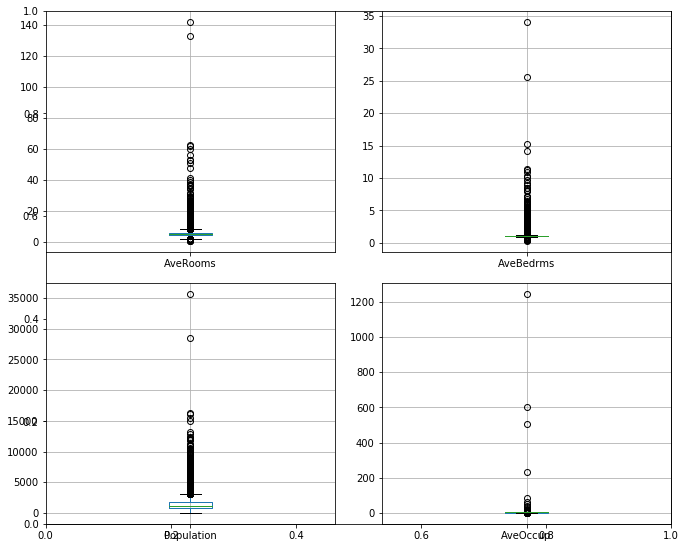

In [55]:
housing = pd.DataFrame(data= np.c_[houses['data'], houses['target']],
                     columns= houses['feature_names'] + ['target'])

fig, ax = plt.subplots(figsize=(10, 8))
ax1 = fig.add_subplot(2,2,1)
housing.boxplot(column='AveRooms', ax = ax1)
ax2 = fig.add_subplot(2,2,2)
housing.boxplot(column='AveBedrms',ax = ax2)
ax3 = fig.add_subplot(2,2,3)
housing.boxplot(column='Population',ax = ax3)
ax4 = fig.add_subplot(2,2,4)
housing.boxplot(column='AveOccup',ax = ax4)

plt.tight_layout()
plt.show()

There do appear to be a lot of outliers for all 4 of these variables that affect the visualization of each one.

## Task 1.2 
Visualize the dependency of the target on each feature (2d scatter plot).

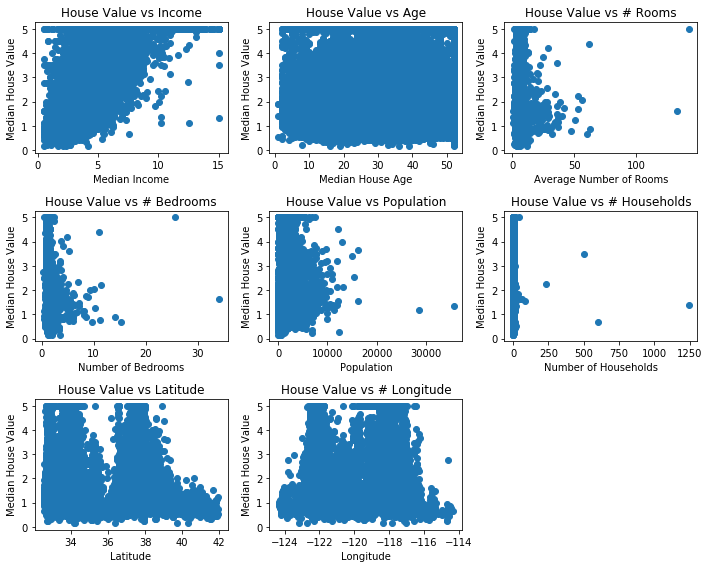

In [168]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(3,3,1)
ax1.scatter(housing['MedInc'],housing['target'])
plt.title('House Value vs Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

ax2 = fig.add_subplot(3,3,2)
ax2.scatter(housing['HouseAge'],housing['target'])
plt.title('House Value vs Age')
plt.xlabel('Median House Age')
plt.ylabel('Median House Value')

ax3 = fig.add_subplot(3,3,3)
ax3.scatter(housing['AveRooms'],housing['target'])
plt.title('House Value vs # Rooms')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value')

ax4 = fig.add_subplot(3,3,4)
ax4.scatter(housing['AveBedrms'],housing['target'])
plt.title('House Value vs # Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median House Value')

ax5 = fig.add_subplot(3,3,5)
ax5.scatter(housing['Population'],housing['target'])
plt.title('House Value vs Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')

ax6 = fig.add_subplot(3,3,6)
ax6.scatter(housing['AveOccup'],housing['target'])
plt.title('House Value vs # Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')

ax7 = fig.add_subplot(3,3,7)
ax7.scatter(housing['Latitude'],housing['target'])
plt.title('House Value vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Median House Value')

ax8 = fig.add_subplot(3,3,8)
ax8.scatter(housing['Longitude'],housing['target'])
plt.title('House Value vs # Longitude')
plt.xlabel('Longitude')
plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()

Income seems to be positively correlated to house value, which follows intuition (people with higher incomes can purchase nicer houses). There seems to be no correlation between house value and age. Number of Rooms/Bedrooms/Households and Population do not appear to be correlated to house value. The data for latitude and longitude seem to suggest that there are certain geographical locations that have higher valued houses than other locations (i.e. the difference between a house in Beverly Hills vs Topeka, Kansas).

## Task 1.3 
Split data in training and test set. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters. Does scaling the data with StandardScaler help?.

In [162]:
X = housing.loc[:,'MedInc':'Longitude']
y = pd.DataFrame(housing)['target']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [74]:
# Linear Regression with default parameters
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.60613675289824287

In [75]:
# Ridge Regression with default parameters
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.60615146846564349

In [76]:
# Lasso with default parameters
np.mean(cross_val_score(Lasso(), X_train, y_train, cv=10))

0.29154912092645036

In [78]:
# Elastic Net with default parameters
np.mean(cross_val_score(ElasticNet(), X_train, y_train, cv=10))

0.42949680843399296

Now to see if scaling the data with StandardScaler helps:

In [103]:
# Scaling the Data and Running Linear Regression
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train_scaled, y_train)
np.mean(cross_val_score(lr, X_train_scaled, y_train, cv=10))

0.60613675289824331

In [105]:
# Ridge Regression with Scaled Data
ridge = Ridge().fit(X_train_scaled, y_train)
np.mean(cross_val_score(ridge, X_train_scaled, y_train, cv=10))

0.60614311772937468

In [109]:
# Lasso with Scaled Data
las = Lasso().fit(X_train_scaled, y_train)
np.mean(cross_val_score(las, X_train_scaled, y_train, cv=10))

-0.00060115011370871492

In [108]:
# Elastic Net with Scaled Data
en = ElasticNet().fit(X_train_scaled, y_train)
np.mean(cross_val_score(en, X_train, y_train, cv=10))

0.42949680843399296

## Task 1.4 
Tune the parameters of the models using GridSearchCV. Do the results improve?

In [161]:
# GridSearchCV for Ridge
from sklearn.model_selection import KFold
param_grid_r = {'alpha': np.logspace(-3, 3, 13)}
grid_r = GridSearchCV(Ridge(), param_grid_r, cv=10)
grid_r.fit(X_train, y_train)
np.mean(cross_val_score(grid_r, X_train, y_train, cv=10))

0.60563394430728112

In [153]:
# GridSearchCV for Lasso
param_grid_l = {'alpha': np.logspace(-3, 0, 13)}
grid_l = GridSearchCV(Lasso(normalize=True), param_grid_l, cv=10)
grid_l.fit(X_train, y_train)
np.mean(cross_val_score(grid_l, X_train, y_train, cv=10))

0.49275149806754026

In [133]:
# GridSearchCV for Elastic Net
param_grid_en = {'alpha': np.logspace(-4, -1, 10),
              'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
grid_en = GridSearchCV(ElasticNet(), param_grid_en, cv=10)
grid_en.fit(X_train, y_train)
np.mean(cross_val_score(grid_en, X_train, y_train, cv=10))

0.60535137778335657

The score for Ridge slightly decreases from 0.6061 to 0.6056, Lasso's score improves from 0.2915 to 0.4927, and Elastic Net's score also improves about 0.2 from 0.4295 to 0.6054, which is nearly as good as Ridge's score using GridSearch. See below visualizations of the dependence of the validation score on the parameters for Ridge, Lasso and
ElasticNet:

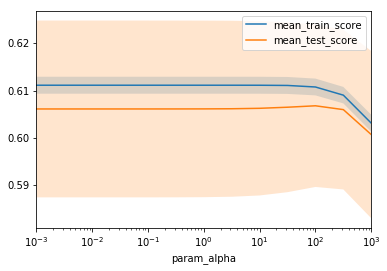

In [127]:
# Ridge Regression Visualization of dependence of validation score on alpha
import warnings
warnings.filterwarnings('ignore')

results = pd.DataFrame(grid_r.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.show()

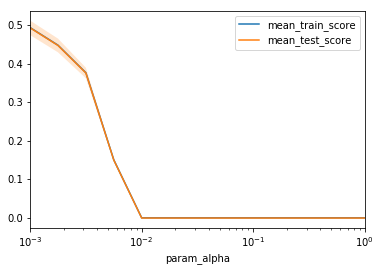

In [130]:
# Lasso Visualization of dependence of validation score on alpha
import warnings
warnings.filterwarnings('ignore')

results = pd.DataFrame(grid_l.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.show()

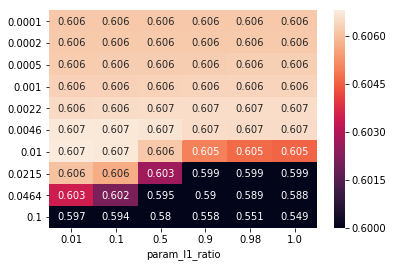

In [137]:
# Elastic Net Visualization of dependence of validation score on alpha
res = pd.pivot_table(pd.DataFrame(grid_en.cv_results_), values='mean_test_score', 
                     index='param_alpha', columns='param_l1_ratio')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)
plt.show()

Ridge regression maintains a cv score of ~0.611 for alpha = 0.001 to just after alpha = 100, at which point it curves down to eventually 0.6 at alpha = 1000. Lasso has the highest cv score the lower the alpha is (at alpha = 0.001, cv score = 0.47, which is its peak value) and then sharply declines as alpha increases, reaching 0 at alpha = 0.01. For Elastic Net, the optimal combination of parameters is alpha = 0.01, and L1 ratio of either 0.01 or 0.1 as shown by the plot above, those two combinations have the lightest shading of all the cv scores labelled 0.607, which is the highest value on the plot.

## Task 1.5: 
Visualize the coefficients of the resulting models. Do they agree on which features are important?

Linear Regression yielded the same cv score for scaled/unscaled data so I've arbitrarily decided to plot the unscaled model's coefficients:

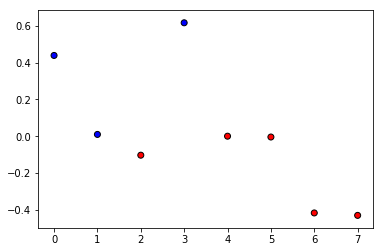

In [169]:
# Plot of Linear Regression Coefficients
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]),
            lr.coef_, c=np.sign(lr.coef_), 
            cmap="bwr_r", edgecolor='k')
plt.show()

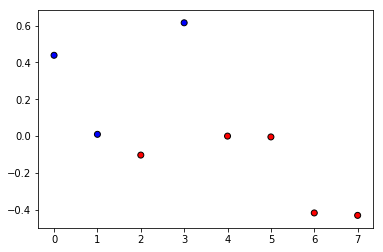

In [170]:
# Plot of Ridge Regression Coefficients
ridge = Ridge().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]),
            ridge.coef_, c=np.sign(ridge.coef_), 
            cmap="bwr_r", edgecolor='k')
plt.show()

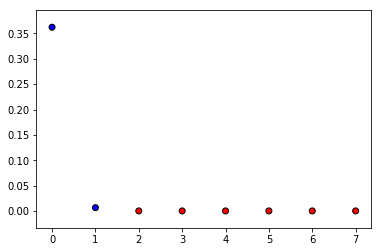

In [146]:
# Plot of Lasso Coefficients
lasso = grid_l.best_estimator_
plt.scatter(range(X_train.shape[1]), lasso.coef_, 
            c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
plt.show()

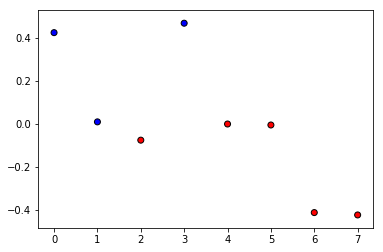

In [147]:
# Plot of Elastic Net Coefficients
elastic_net = grid_en.best_estimator_
plt.scatter(range(X_train.shape[1]), elastic_net.coef_, 
            c=np.sign(elastic_net.coef_), cmap="bwr_r", edgecolor='k')
plt.show()

From the plots above, they all seem to agree that feature 0 (Median Income) is very important. Lasso doesn't think that any of the other features are important (they all hover around 0), but the Linear Regression, Ridge, and Elastic Net all agree that feature 3 (Number of Bedrooms) is also very important and has a positive coefficient, perhaps following the intuition that houses with more bedrooms are bigger and therefore worth more. These three models also agree that features 6 and 7 (Latitude and Longitude) are somewhat important and negatively correlated, but as I mentioned above I think this just suggests that certain geographies have more expensive houses than other geographies.